In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train-Copy1.csv')
test = pd.read_csv('titanic_test-Copy1.csv')

<AxesSubplot:>

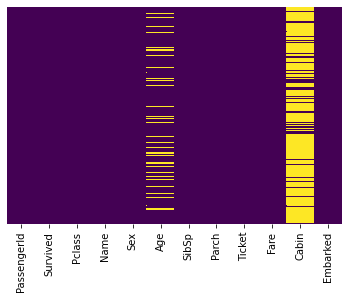

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [5]:
sns.set_style('whitegrid')

<AxesSubplot:>

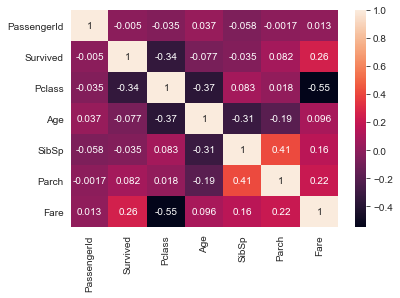

In [6]:
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

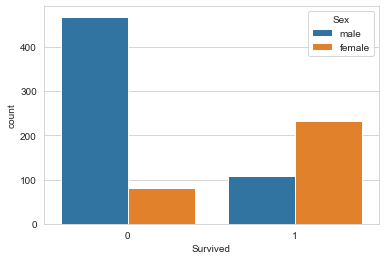

In [7]:
sns.countplot(x='Survived', hue= 'Sex', data= train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

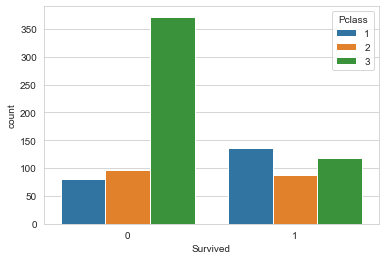

In [8]:
sns.countplot(x='Survived', hue= 'Pclass', data= train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

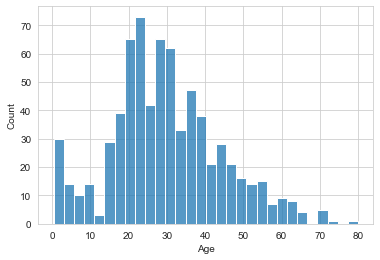

In [9]:
sns.histplot(train['Age'].dropna(),kde=False, bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

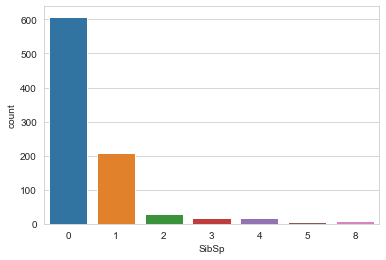

In [10]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

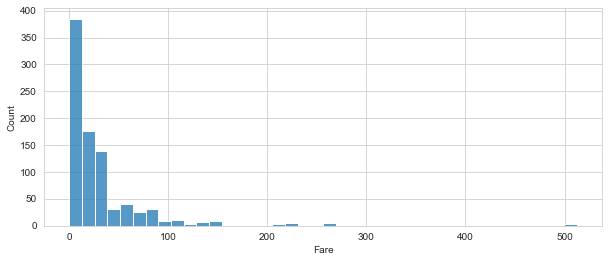

In [11]:
plt.figure( figsize=(10,4))
sns.histplot(train['Fare'].dropna(),kde=False, bins=40)

# Data cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

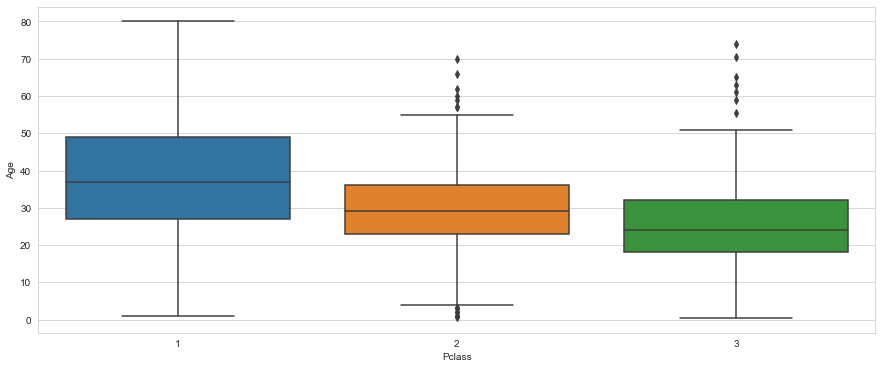

In [12]:
plt.figure( figsize=(15,6))
sns.boxplot(data=train, x='Pclass', y='Age')

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            Age = 37
        elif Pclass == 2:
            Age = 29
        else:
            Age = 24
        
    return Age

In [14]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [15]:
train.drop('Cabin',axis=1, inplace=True)

In [16]:
train.dropna(inplace=True)

In [17]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [18]:
train = pd.concat([train, sex, embark], axis=1)

In [19]:
train.drop(['Name','Sex','Ticket','Embarked'], axis=1, inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Train and test regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [22]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [27]:
predictions = logmodel.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267

